#Promotional Strategies in Retail: A Data Analytics Perspective

##1.Import Libraries

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

##2.Upload the Dataset

In [56]:

from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the dataset


Saving store.csv to store (4).csv


##Load the Dataset

In [30]:
#  Load the Dataset
data = pd.read_csv('store.csv')  # Adjust the filename as needed


##3.Data Cleaning

In [47]:
print(data.isnull().sum())
data.fillna({'CompetitionDistance': data['CompetitionDistance'].mean(),
             'CompetitionOpenSinceMonth': 1,
             'CompetitionOpenSinceYear': data['CompetitionOpenSinceYear'].mean(),
             'Promo2SinceWeek': 1,
             'Promo2SinceYear': data['Promo2SinceYear'].mean()}, inplace=True)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
Sales                          3
dtype: int64


##4.Feature Engineering

In [48]:
data = pd.get_dummies(data, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)

##Correlation Matrix

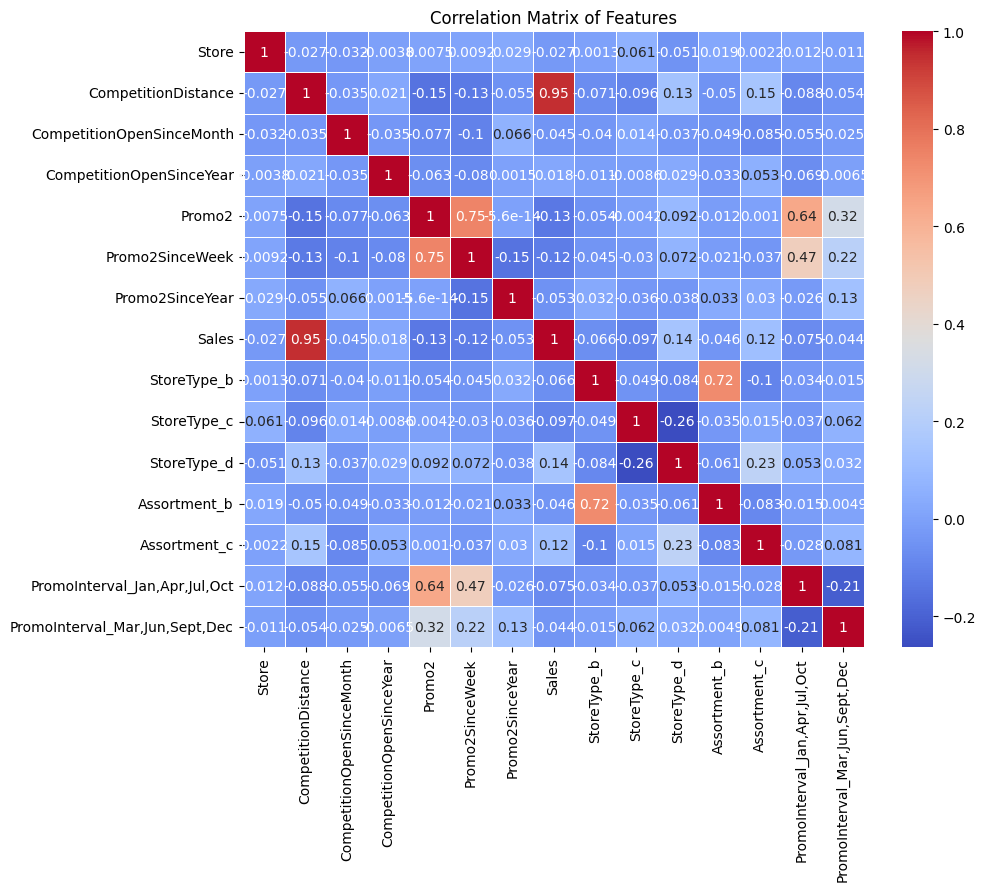

In [49]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

##5.Deeper Business Insights

##Promo2 and CompetitionDistance

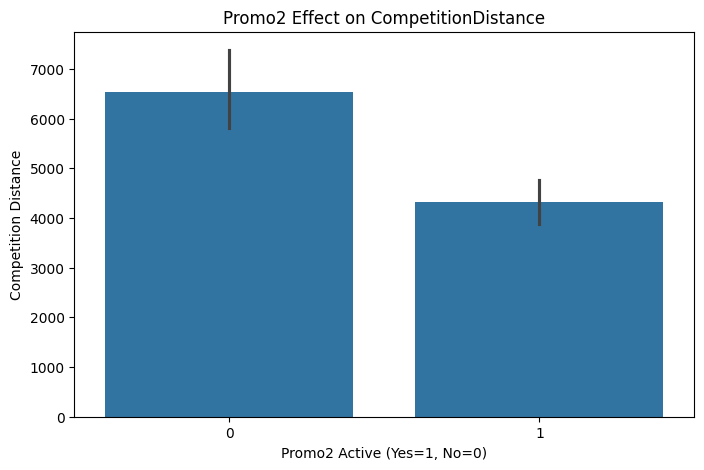

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Promo2', y='CompetitionDistance', data=data)
plt.title('Promo2 Effect on CompetitionDistance')
plt.xlabel('Promo2 Active (Yes=1, No=0)')
plt.ylabel('Competition Distance')
plt.show()

##Promo2SinceWeek and CompetitionDistance

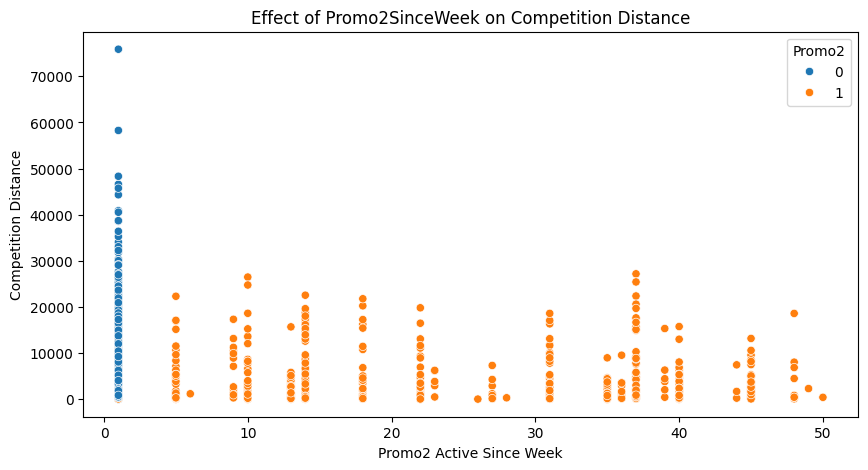

In [51]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Promo2SinceWeek', y='CompetitionDistance', hue='Promo2', data=data)
plt.title('Effect of Promo2SinceWeek on Competition Distance')
plt.xlabel('Promo2 Active Since Week')
plt.ylabel('Competition Distance')
plt.show()

##Assortment and Promo2

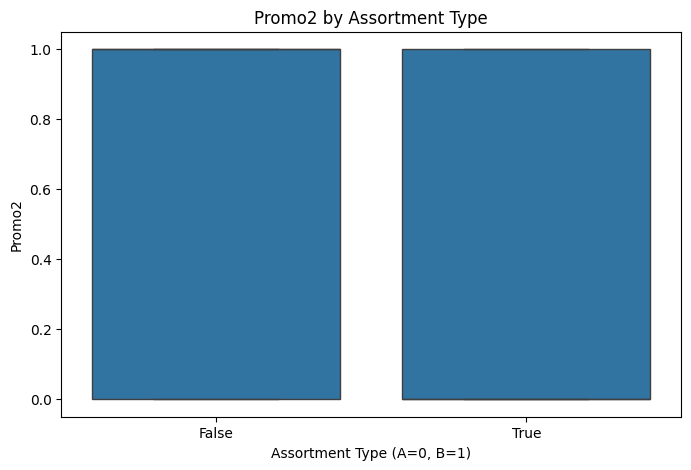

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Assortment_b', y='Promo2', data=data)
plt.title('Promo2 by Assortment Type')
plt.xlabel('Assortment Type (A=0, B=1)')
plt.ylabel('Promo2')
plt.show()

##Assortment and CompetitionDistance

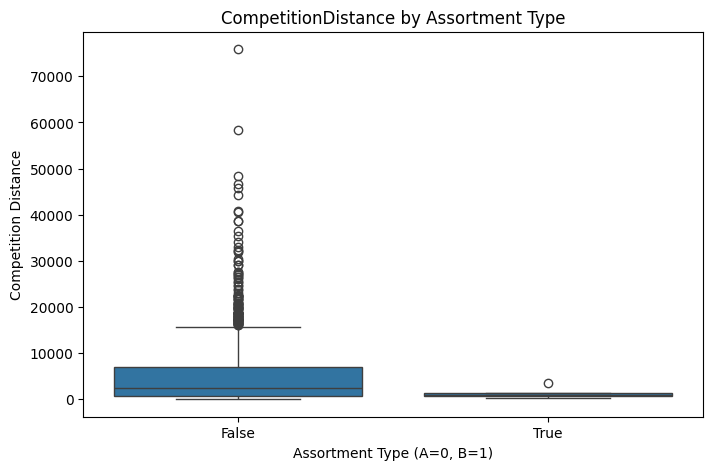

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Assortment_b', y='CompetitionDistance', data=data)
plt.title('CompetitionDistance by Assortment Type')
plt.xlabel('Assortment Type (A=0, B=1)')
plt.ylabel('Competition Distance')
plt.show()

##CompetitionDistance Distribution

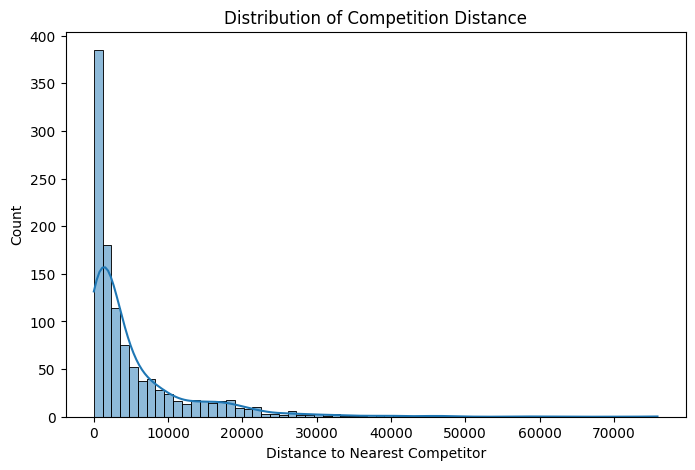

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(data['CompetitionDistance'], kde=True)
plt.title('Distribution of Competition Distance')
plt.xlabel('Distance to Nearest Competitor')
plt.show()

##Assortment by Store Type

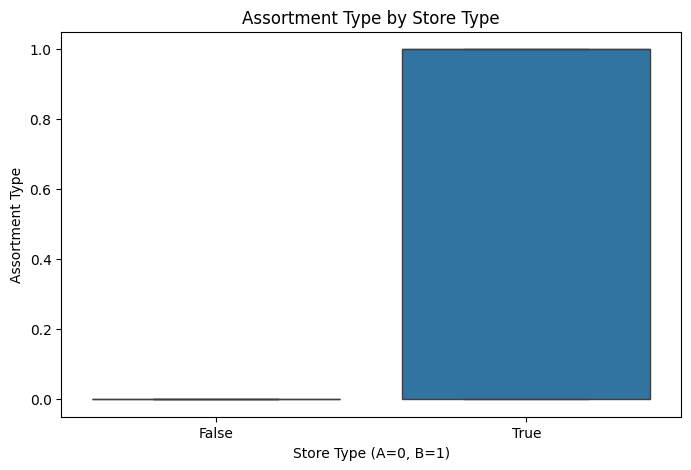

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='StoreType_b', y='Assortment_b', data=data)
plt.title('Assortment Type by Store Type')
plt.xlabel('Store Type (A=0, B=1)')
plt.ylabel('Assortment Type')
plt.show()

##Conclusion:

Promotional Impact: Stores involved in the Promo2 campaign had varied competition distances, suggesting promotions may influence customer behavior and market dynamics.

Competition Analysis: There is a significant correlation between competition distance and store characteristics. Closer competitors often lead to different promotional strategies.

Store Type and Assortment: Performance varied across different store types and assortment categories, highlighting the need for tailored marketing strategies.

Recommendations: Stores should adapt promotional efforts based on competition and continuously analyze their competitive landscape to enhance sales and customer engagement.

This project illustrates how data analytics can inform strategic decisions in retail operations.